# Dual Phosphorylation Cycle

In [1]:
%matplotlib inline
from ecell4.prelude import *

In [2]:
citation(20133748)

Takahashi K, Tanase-Nicola S, ten Wolde PR, Spatio-temporal correlations can drastically change the response of a MAPK pathway. *Proceedings of the National Academy of Sciences of the United States of America*, **6**(107), 2473-8, 2010. [10.1073/pnas.0906885107](https://doi.org/10.1073/pnas.0906885107). PubMed PMID: [20133748](https://www.ncbi.nlm.nih.gov/pubmed/20133748).

In [3]:
@species_attributes
def attrgen(radius, D):
    K | Kp | Kpp | KK | PP | K_KK | Kp_KK | Kpp_PP | Kp_PP | {"radius": radius, "D": D}

@reaction_rules
def rulegen(kon1, koff1, kcat1, kon2, koff2, kcat2):
    (K + KK == K_KK | (kon1, koff1)
        > Kp + KK | kcat1
        == Kp_KK | (kon2, koff2)
        > Kpp + KK | kcat2)

    (Kpp + PP == Kpp_PP | (kon1, koff1)
        > Kp + PP | kcat1
        == Kp_PP | (kon2, koff2)
        > K + PP | kcat2)

In [4]:
radius, D = 0.0025, 1.0
ka1, kd1, kcat1 = 0.04483455086786913, 1.35, 1.5
ka2, kd2, kcat2 = 0.09299017957780264, 1.73, 15.0

m = NetworkModel()
m.add_species_attributes(attrgen(radius, D))
m.add_reaction_rules(rulegen(ka1, kd2, kcat1, ka2, kd2, kcat2))

In [5]:
show(m)

K | {'D': 1.0, 'radius': 0.0025}
Kp | {'D': 1.0, 'radius': 0.0025}
Kpp | {'D': 1.0, 'radius': 0.0025}
KK | {'D': 1.0, 'radius': 0.0025}
PP | {'D': 1.0, 'radius': 0.0025}
K_KK | {'D': 1.0, 'radius': 0.0025}
Kp_KK | {'D': 1.0, 'radius': 0.0025}
Kpp_PP | {'D': 1.0, 'radius': 0.0025}
Kp_PP | {'D': 1.0, 'radius': 0.0025}

K + KK > K_KK | 0.04483455086786913
K_KK > K + KK | 1.73
K_KK > Kp + KK | 1.5
Kp + KK > Kp_KK | 0.09299017957780265
Kp_KK > Kp + KK | 1.73
Kp_KK > Kpp + KK | 15.0
Kpp + PP > Kpp_PP | 0.04483455086786913
Kpp_PP > Kpp + PP | 1.73
Kpp_PP > Kp + PP | 1.5
Kp + PP > Kp_PP | 0.09299017957780265
Kp_PP > Kp + PP | 1.73
Kp_PP > K + PP | 15.0


In [6]:
session = Session(model=m, y0={"K": 120, "KK": 30, "PP": 30})

In [7]:
ret = session.run(60.0)

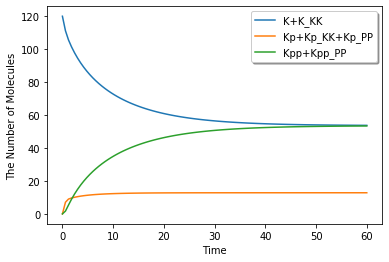

In [8]:
ret.plot(y=["K+K_KK", "Kp+Kp_KK+Kp_PP", "Kpp+Kpp_PP"], legend=True)

In [9]:
ret = session.run(60.0, ndiv=100, solver='gillespie')

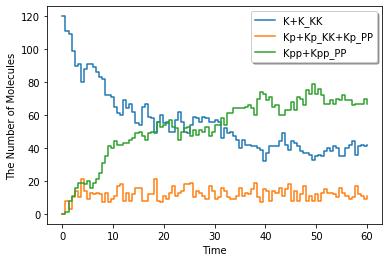

In [10]:
ret.plot(y=["K+K_KK", "Kp+Kp_KK+Kp_PP", "Kpp+Kpp_PP"], legend=True, step=True)